### 前処理（ファイルフォーマットの統一）
なお天候は基準が明確でなく、記載する天候の種類も違うため使用しない

In [30]:
import pandas as pd

# CSVデータを読み込む
df_akita = pd.read_csv('./data/akita-weather.csv')

# 列名を変更する
df_akita.columns = ['date', 'temp_max', 'temp_min', 'precipitation', 'unknown', 'wind', 'weather']

# 不要な列を削除する
df_akita = df_akita.drop(['unknown','weather'], axis=1)

# 日付の形式を変更する
df_akita['date'] = pd.to_datetime(df_akita['date']).dt.strftime('%Y-%m-%d')

# CSVデータとして出力する
df_akita.to_csv('./data/akita-weather-edited.csv', index=False)

# CSVデータを読み込む
df_seattle = pd.read_csv('./data/seattle-weather.csv')

# 不要な列を削除する
df_seattle = df_seattle.drop(['weather'], axis=1)
# CSVデータとして出力する
df_seattle.to_csv('./data/seattle-weather-edited.csv', index=False)

# 平均気温のカラムを追加する
df_akita['temp_avg'] = (df_akita['temp_max'] + df_akita['temp_min']) // 2
df_seattle['temp_avg'] = (df_seattle['temp_max'] + df_seattle['temp_min']) // 2
# 欠損値のある行を削除
missing_rows_seattle = df_seattle[df_seattle['temp_avg'].isnull()].index
missing_rows_akita = df_seattle[df_akita['temp_avg'].isnull()].index
df_seattle = df_seattle.drop(missing_rows_seattle)
df_akita = df_akita.drop(missing_rows_seattle)
df_seattle = df_seattle.drop(missing_rows_akita)


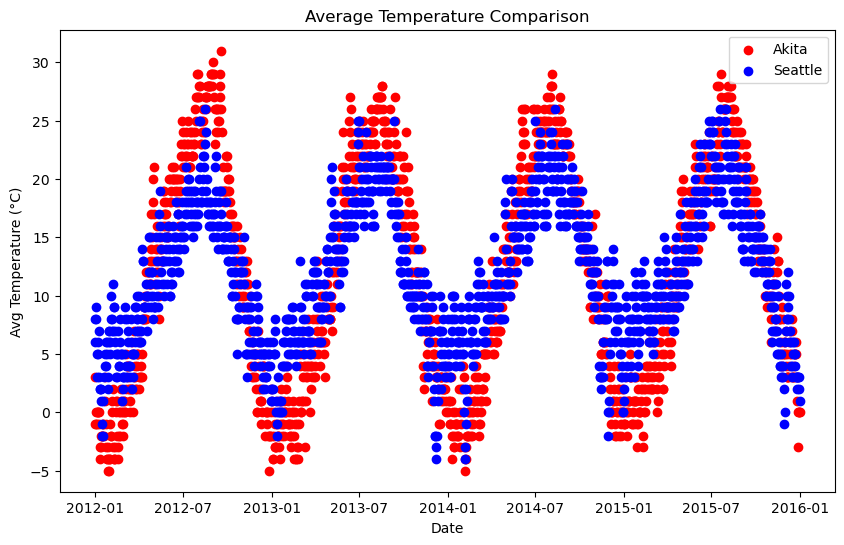

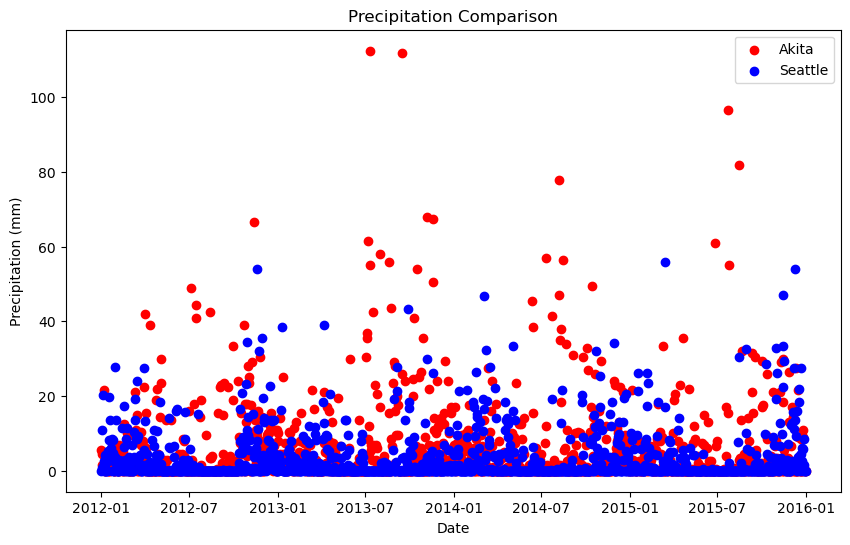

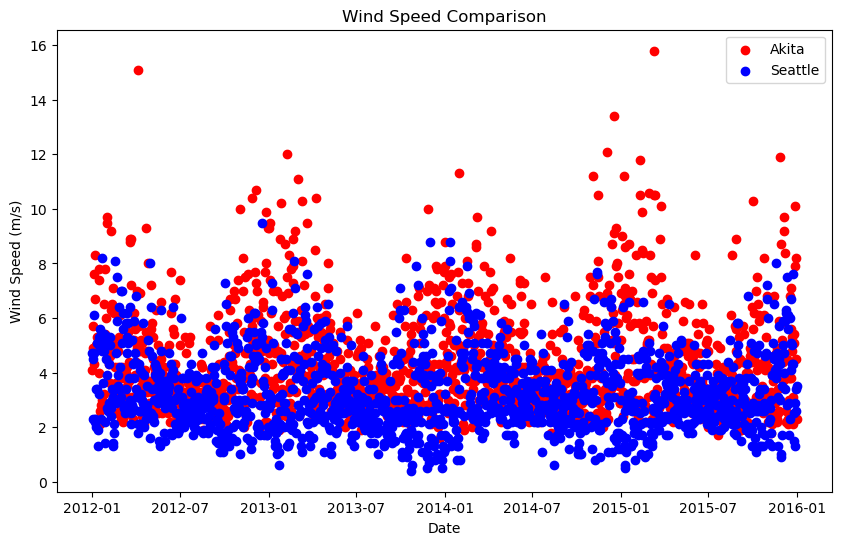

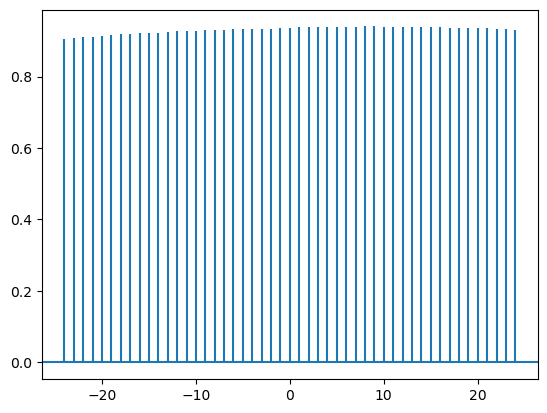

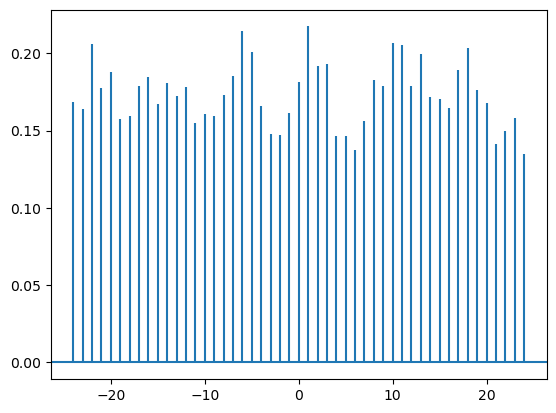

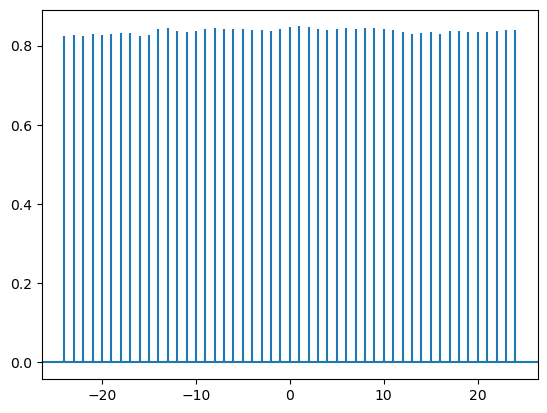

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
from scipy import signal
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
# 日付をdatetime型に変換
df_akita['date'] = pd.to_datetime(df_akita['date'])
df_seattle['date'] = pd.to_datetime(df_seattle['date'])

# 平均気温の散布図
plt.figure(figsize=(10, 6))
plt.scatter(df_akita['date'], df_akita['temp_avg'], color='red', label='Akita')
plt.scatter(df_seattle['date'], df_seattle['temp_avg'], color='blue', label='Seattle')
plt.title('Average Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.show()

# 降水量の散布図
plt.figure(figsize=(10, 6))
plt.scatter(df_akita['date'], df_akita['precipitation'], color='red', label='Akita')
plt.scatter(df_seattle['date'], df_seattle['precipitation'], color='blue', label='Seattle')
plt.title('Precipitation Comparison')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

# 風速の散布図
plt.figure(figsize=(10, 6))
plt.scatter(df_akita['date'], df_akita['wind'], color='red', label='Akita')
plt.scatter(df_seattle['date'], df_seattle['wind'], color='blue', label='Seattle')
plt.title('Wind Speed Comparison')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.show()

# 相互相関コレログラム（原系列）
xcor_value = plt.xcorr(df_akita['temp_avg'], 
                       df_seattle['temp_avg'],
                       detrend=mlab.detrend_none, 
                       maxlags=24)
plt.show()
# 相互相関コレログラム（原系列）
xcor_value = plt.xcorr(df_akita['precipitation'], 
                       df_seattle['precipitation'],
                       detrend=mlab.detrend_none, 
                       maxlags=24)
plt.show()
# 相互相関コレログラム（原系列）
xcor_value = plt.xcorr(df_akita['wind'], 
                       df_seattle['wind'],
                       detrend=mlab.detrend_none, 
                       maxlags=24)
plt.show()
# # DTWを計算する
# distance_temp_max, _ = fastdtw(df_akita['temp_max'], df_seattle['temp_max'], dist=euclidean)
# distance_precipitation, _ = fastdtw(df_akita['precipitation'], df_seattle['precipitation'], dist=euclidean)
# distance_wind, _ = fastdtw(df_akita['wind'], df_seattle['wind'], dist=euclidean)

# print('Max Temperature - Correlation: ', correlation_temp_max, ', DTW: ', distance_temp_max)
# print('Precipitation - Correlation: ', correlation_precipitation, ', DTW: ', distance_precipitation)
# print('Wind - Correlation: ', correlation_wind, ', DTW: ', distance_wind)


